<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=4.5>
		<div align=center>
			<font face="IranNastaliq" size=30>
				<p></p>
				<p></p>
به نام خدا
			</font>
			<br />
			<br />
			<font color=#FF7983>
دانشگاه تهران - دانشکده مهندسی برق و کامپیوتر
            </font>
            <br />
			<font color=midblue>
هوش مصنوعی
            </font>
			<br />
           <font color=#738a9b> 
پاییز ۱۴۰۱
               </div>
		<hr/>
		<font color='red' size=6>
			<div align=center>
پروژه سه
            </div>
		</font>
        <br />
		<div align=center>
بهیاد زرنقی 
            <br />
            شماره دانشجویی: ۸۱۰۶۹۸۲۴۹
        </div>
		<hr />
		<style type="text/css" scoped>
        p{
        border: 1px solid #a2a9b1;background-color: #f8f9fa;display: inline-block;
        };
        </style>            
		
</div>

as first stone in the project we should import and implement essiential modules.

In [2]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from parsivar import Normalizer
from parsivar import FindStems
from collections import Counter
import requests
import json

In [3]:
train=pd.read_csv("G:\\E Learn\\Artificial Intelligence\\CA3_data\\train.csv")

In [4]:
train

,label,content
0,فناوری,گزارش های منتشر شده حاکی از آن است که کاربران ...
1,ورزشی,سوپر استار سینما و از قهرمانان سابق ووشو ــ کو...
2,حوادث,مدیرعامل شرکت عمران آب کیش از فوت یک نفر در آت...
3,فناوری,یک نوجوان انگلیسی به اتهام هک حساب‌های کاربری ...
4,سلامت,دانشمندان در جدیدترین مطالعات خود اثرات جدید و...
...,...,...
8995,حوادث,شانزدهم مهر امسال درپی تماس با مرکز فوریت‌های ...
8996,ورزشی,اتحادیه فوتبال ترینیداد و توباگو اعلام کرده تی...
8997,فرهنگی/هنری,اسامی 18 فیلم بخش مسابقه مستند ششمین دوره جشنو...
8998,حوادث,کامیونت حامل بار تخته‌های چوبی عصر دیروز چهارش...


# Phase1

The project goal is to process texts written in persian language.Thus, for moving the whole process forward we need to use a persian_based module named **parsivar**, as it needs to be altered based on the persian language and alphabetic.
as a first step we will normalize the texts.In other words, we will eliminate unnecessary and mostly-repeated words including stop words, punctuation and etc.
So we call the normalizer object from the module. Stop words will be eliminated in the further steps.

In [5]:
myNormalizer=Normalizer()
myStemmer=FindStems()

In [131]:
punctuations=''':،؛.()/'''
for i in range(len(train)):
    train['content'][i]=myNormalizer.normalize(train['content'][i])
    train['content'][i]=train['content'][i].replace('\u200c', ' ')
    train['content'][i]=train['content'][i].replace('\xa0', ' ')
    train['content'][i]=myStemmer.convert_to_stem(train['content'][i])
    for stop_word in a:
        train['content'][i]=train['content'][i].replace(stop_word, '')

Obviously there are other preprocessing functions that are not included here for the cause of simplicity including:
**Sentence Tokenizer**:converting the text to the cells of setences.
**word Tokenizer**:converting the text to the cells of words. This is a quite essential section for our purpose. But the this method will be used manually in the next section.

**Stemmer**:Stemming is the process of producing morphological variants of a root/base word. it will perform root founding with deleting suffixes and prefixses.For instance, searching for “boat” might also return “boats” and “boating”. Here, “boat” would be the stem for .In some cases it may produce inadequate forms for roots.

**Lemmatization**:In contrast to stemming, lemmatization looks beyond word reduction and considers a language’s full vocabulary to apply a morphological analysis to words.Thus, it will produce unrelated roots with a low possibility.for example, The lemma of ‘was’ is ‘be’ and the lemma of ‘mice’ is ‘mouse’.

# Phase 2
here we will merge all the texts resembled for the each class nad create a hyper string.

In [132]:
techContent=[train['content'][i] for i in range(len(train['label'])) if train['label'][i]=='فناوری']
techContent=' '.join(map(str,techContent))

In [133]:
sportContent=[train['content'][i] for i in range(len(train['label'])) if train['label'][i]=='ورزشی']
sportContent=' '.join(map(str,sportContent))

In [134]:
healthContent=[train['content'][i] for i in range(len(train['label'])) if train['label'][i]=='سلامت']
healthContent=' '.join(map(str,healthContent))

In [135]:
eventContent=[train['content'][i] for i in range(len(train['label'])) if train['label'][i]=='حوادث']
eventContent=' '.join(map(str,eventContent))

In [136]:
artContent=[train['content'][i] for i in range(len(train['label'])) if train['label'][i]=='فرهنگی/هنری']
artContent=' '.join(map(str,artContent))

In [137]:
politicsContent=[train['content'][i] for i in range(len(train['label'])) if train['label'][i]=='سیاسی']
politicsContent=' '.join(map(str,politicsContent))

we converted hyper texts to the list formation as amean of tokenization.

In [138]:
techContent_l=techContent.split()
sportContent_l=sportContent.split()
healthContent_l=healthContent.split()
eventContent_l=eventContent.split()
artContent_l=artContent.split()
politicsContent_l=politicsContent.split()
# stop words
mostly_used=['من','شدند','ما','گفت','داد','وی' ,'او' ,'گفت','همچنین','باشد','هستند','هایی','اند','اما','بود','دهد','»','هم','یا','کنند','ای','بر','کرد' ,'تا','یک','ها','برای','با' ,'را','های','که','می' ,'این' ,'از','در','-' ,'تواند' ,' از' ,'به' ,'است' ,'شد', 'شده' , 'و' , 'این' , 'می' , 'که' , 'های' , 'را' , 'با' , 'برای' , 'ها ' , 'آن'  , 'کند'  , 'خود' , 'دارد' , 'یا ' , 'کنید' , 'خواهد' , '«' , '"' , 'نیز' , 'کرده','شود' ]

techContent_l=[techContent_l[i] for i in range(len(techContent_l)) if techContent_l[i] not in mostly_used ] 
sportContent_l=[sportContent_l[i] for i in range(len(sportContent_l)) if sportContent_l[i] not in mostly_used ]        
healthContent_l=[healthContent_l[i] for i in range(len(healthContent_l)) if healthContent_l[i] not in mostly_used ]        
eventContent_l=[eventContent_l[i] for i in range(len(eventContent_l)) if eventContent_l[i] not in mostly_used ]        
artContent_l=[artContent_l[i] for i in range(len(artContent_l)) if artContent_l[i] not in mostly_used ]        
politicsContent_l=[politicsContent_l[i] for i in range(len(politicsContent_l)) if politicsContent_l[i] not in mostly_used ]        

In [142]:
# as an example:
eventContent_l

['مدیرعامل',
 'شرکت',
 'عمران',
 'آب',
 'کیش',
 'فوت',
 'نفر',
 'آتش',
 'سوزی',
 'بازار',
 'پردیس',
 'جزیره',
 'کیش',
 'خبر',
 'گزارش',
 'ایلنا',
 'طیبی',
 'مدیرعامل',
 'شرکت',
 'عمران',
 'آب',
 'کیش',
 'درباره',
 'جزییات',
 'آتش',
 'سوزی',
 'بازار',
 'پردیس',
 'جزیره',
 'کیش',
 'ساعت',
 '07',
 '55',
 'صبح',
 'امروز',
 'مورد',
 'آتش',
 'سوزی',
 'بازار',
 'پردیس',
 'جزیره',
 'کیش',
 'اتفاق',
 'افتاد',
 'بیان',
 'اینکه',
 'بلافاصله',
 'آتش',
 'نشانی',
 'محل',
 'حادثه',
 'اعزام',
 'ادامه',
 'خوشبختانه',
 'حریق',
 'مهار',
 'برآورد',
 'اولیه',
 'تقریبا',
 '20',
 'درصد',
 'خسارت',
 'بازار',
 'وارد',
 'مدیرعامل',
 'شرکت',
 'عمراه',
 'آب',
 'کیش',
 'متاسفانه',
 'نفر',
 'حادثه',
 'جان',
 'دست',
 'حال',
 'حاضر',
 'حریق',
 'کاملا',
 'مهار',
 'تمامی',
 'غرفه',
 'داران',
 'خواهش',
 'کنم',
 'حضور',
 'محل',
 'پرهیز',
 'طیبی',
 'درباره',
 'علت',
 'حادثه',
 'علت',
 'حادثه',
 'دست',
 'بررسی',
 'تیم',
 'آتش',
 'نشانی',
 'همچنان',
 'حال',
 'لکه',
 'گیری',
 'فرمانده',
 'انتظامی',
 'شرق',
 'استان',
 'تهران'

top 5 mostly used words in each class will be used with most_common instance.

In [144]:
mostAccured_tech= Counter(techContent_l).most_common(5)
mostAccured_sport= Counter(sportContent_l).most_common(5)
mostAccured_health= Counter(healthContent_l).most_common(5)
mostAccured_event= Counter(eventContent_l).most_common(5)
mostAccured_art= Counter(artContent_l).most_common(5)
mostAccured_politics= Counter(politicsContent_l).most_common(5)

In the next step we will calculate the probability of each word used in all six types of class.

In [146]:
dicTech=Counter(techContent_l)
dicSport=Counter(sportContent_l)
dicHealth=Counter(healthContent_l)
dicEvent=Counter(eventContent_l)
dicArt=Counter(artContent_l)
dicPolitics=Counter(politicsContent_l)
probTech_l={i:(dicTech[i]/len(techContent_l)) for i in dicTech}
probSport_l={i:(dicSport[i]/len(sportContent_l)) for i in dicSport}      
probHealth_l={i:(dicHealth[i]/len(healthContent_l)) for i in dicHealth}       
probEvent_l={i:(dicEvent[i]/len(eventContent_l)) for i in dicEvent}       
probArt_l={i:(dicArt[i]/len(artContent_l)) for i in dicArt}       
probPolitics_l={i:(dicPolitics[i]/len(politicsContent_l)) for i in dicPolitics}       

In [147]:
# as an example:
probPolitics_l

{'رئیس': 0.003032019873115883,
 'جمهوری': 0.0037189456623023015,
 'پیش': 0.001990217014591466,
 'بینی': 0.0003341240243474724,
 'پیشگیری': 8.508748446115756e-05,
 'درمان': 0.00027809080287305156,
 'آسیب': 0.0004856212527783139,
 'اجتماعی': 0.0009899202460481014,
 'وظیفه': 0.00048769655727736653,
 'همه': 0.003268604586007882,
 'بخش': 0.0012472580039306267,
 'حکومت': 0.0003984584638181037,
 'عنوان': 0.002060777367559255,
 'تصریح': 0.0007969169276362074,
 'سرمایه': 0.0005976876957271555,
 'رابطه': 0.0004046843773152616,
 'متقابل': 5.1882612476315584e-05,
 'دارند': 0.0014236588863500998,
 'هر': 0.0028742967311878834,
 'چه': 0.0021624672880128336,
 'کاهش': 0.0005541063012470505,
 'یابند': 2.905426298673673e-05,
 'تقویت': 0.00026978958487684107,
 'گزارش': 0.0022558559904702017,
 'پایگاه': 0.0002822414118711568,
 'اطلاع': 0.0004773200347821034,
 'رسانی': 0.00037563011432852484,
 'ریاست': 0.002027572495574413,
 'سید': 0.00044411516279726143,
 'ابراهیم': 0.00012659357444221004,
 'رئیسی': 0.0004

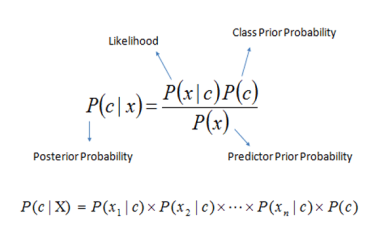

In [151]:
from PIL import Image
myImage = Image. open("Desktop//AI-CA3-Fall 1401.jpg")
myImage

Prior is the probability of the class before having seen any test result (our prior understanding/beliefs modelled in a single probability value). Evidence is also called the marginal likelihood and it acts like a normalizing constant and is probability of the feature independent of class status. Likelihood is the possibility of each feature  given the class. Posterior is the probability that takes both prior knowledge we have about the class, and new data (the test result) into account. simply it is accurance of the class given the features that are known.

## Bigram

In [154]:
techContent_bi=[techContent_s[i:i+2] for i in range(0,len(techContent_s),2)]
techContent_bi=[techContent_bi[i][0]+' ' + techContent_bi[i][1] for i in range(len(techContent_bi)-1)]
techContent_bi

['گزارش منتشر',
 'حاکی کاربران',
 'تلگرام مناطقی',
 'جهان همچون',
 'اروپا خاورمیانه',
 'مشکل مواجه',
 'گزارش ایسنا',
 'نقل تلگرام',
 'دقایقی پیش',
 'پیام رسان',
 'تلگرام صفحه',
 'توییتر اعلام',
 'دسترسی کاربران',
 'اپلیکیشن اروپا',
 'خاورمیانه مشکل',
 'مواجه طبق',
 'پیام نظر',
 'رسد منشا',
 'اختلالات ظهر',
 'امروز پنج',
 'شنبه خارجی',
 'سوی پیام',
 'رسان بوده',
 'ارتباطی داخل',
 'کشور ندارد',
 'پیام رسان',
 'خصوص عنوان',
 'متخصصان تلگرام',
 'زمانی متوجه',
 'چنین اختلالی',
 'حال بررسی',
 'برطرف کردن',
 'مشکل مربوطه',
 'بوده امید',
 'زودی اختلال',
 'رفع کاربران',
 'حساب کاربری',
 'تلگرام دسترسی',
 'یابند نوجوان',
 'انگلیسی اتهام',
 'هک حساب',
 'کاربری ایمیل',
 'تلفن مقام',
 'ارشد آمریکایی',
 'دو سال',
 'حبس دارالتادیب',
 'محکوم گزارش',
 'ایسنا نقل',
 'خبرگزاری آسوشیتدپرس',
 'دادستان گویند',
 'نوجوان نام',
 'کین گمبل',
 'بازه زمانی',
 '2015 2016',
 'اقدام هک',
 'دسترسی اطلاعات',
 'حساب کاربری',
 'ایمیل تلفن',
 'افرادی چون',
 'مارک جیلیانو',
 'مدیر وقت',
 'اف بی',
 'آی جی',
 'جانسون وزیر',

This part relates to Feature Splitting technique of feature engineering. Using N-gram approach can increase the amount of information captured from context. Note that using unigrams might increase inaccuracy of the model, for example check out the following snetences:
I left my phone in the room.
I'm left alone.
Left here has two meanings and we need to know more than one word in order to figure out what left means.
Persian example:

شیر امید را خورد

امید شیر را خورد

This example is rather difficult! For this one, not only we need to check all the words, but also we need to check their order.
In the first sentence, شیر means lion and the sentence translates to "The lion ate Omid".
But in the second one, شیر means milk! The translation will be: "Omid drank the milk".

Using bigram can help the classifier to increase the accuracy by checking the order and combination of words. Pay attention! Increaing number of words attached together doesn't always increase the accuarcy.

## Check correctness
To check whether the model works fine or not, we plot frequent words for each label to see which words can be influential in classifying task.

Let's implement these functions now:

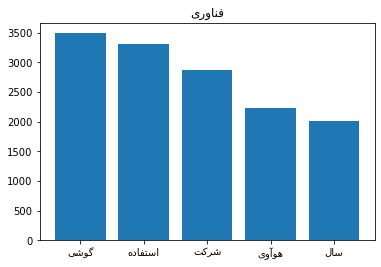

In [158]:
import arabic_reshaper
from bidi.algorithm import get_display
names = [get_display(arabic_reshaper.reshape(mostAccured_tech[i][0])) for i in range(len(mostAccured_tech))]
values = [mostAccured_tech[i][1] for i in range(len(mostAccured_tech))]
plt.bar(range(len(mostAccured_tech)), values, tick_label=names);
plt.title(get_display(arabic_reshaper.reshape('فناوری')));


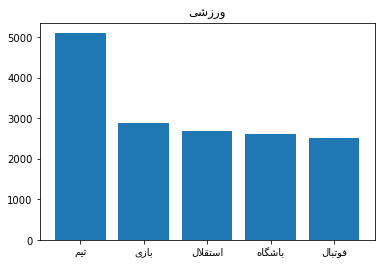

In [159]:
names = [get_display(arabic_reshaper.reshape(mostAccured_sport[i][0])) for i in range(len(mostAccured_sport))]
values = [mostAccured_sport[i][1] for i in range(len(mostAccured_sport))]
plt.bar(range(len(mostAccured_sport)), values, tick_label=names);
plt.title(get_display(arabic_reshaper.reshape('ورزشی')));


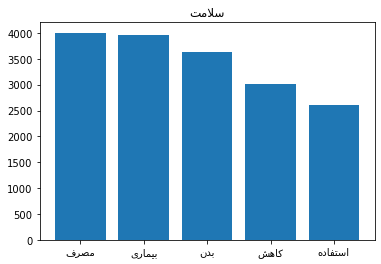

In [160]:
names = [get_display(arabic_reshaper.reshape(mostAccured_health[i][0])) for i in range(len(mostAccured_health))]
values = [mostAccured_health[i][1] for i in range(len(mostAccured_health))]
plt.bar(range(len(mostAccured_health)), values, tick_label=names);
plt.title(get_display(arabic_reshaper.reshape('سلامت')));


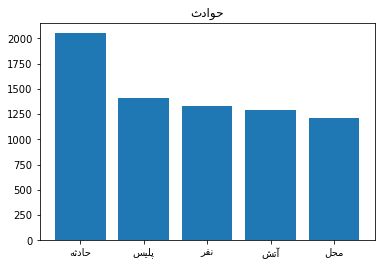

In [162]:
names = [get_display(arabic_reshaper.reshape(mostAccured_event[i][0])) for i in range(len(mostAccured_event))]
values = [mostAccured_event[i][1] for i in range(len(mostAccured_event))]
plt.bar(range(len(mostAccured_event)), values, tick_label=names);
plt.title(get_display(arabic_reshaper.reshape('حوادث')));


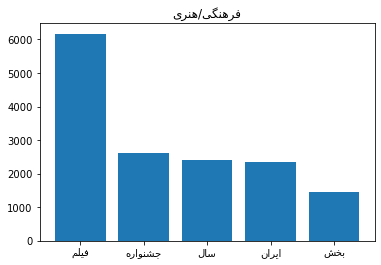

In [163]:
names = [get_display(arabic_reshaper.reshape(mostAccured_art[i][0])) for i in range(len(mostAccured_art))]
values = [mostAccured_art[i][1] for i in range(len(mostAccured_art))]
plt.bar(range(len(mostAccured_art)), values, tick_label=names);
plt.title(get_display(arabic_reshaper.reshape('فرهنگی/هنری')));

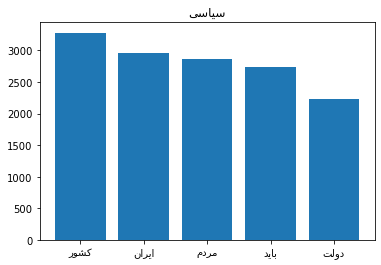

In [164]:
names = [get_display(arabic_reshaper.reshape(mostAccured_politics[i][0])) for i in range(len(mostAccured_politics))]
values = [mostAccured_politics[i][1] for i in range(len(mostAccured_politics))]
plt.bar(range(len(mostAccured_politics)), values, tick_label=names);
plt.title(get_display(arabic_reshaper.reshape('سیاسی')));

# Test Prediction 

In [165]:
test=pd.read_csv("G:\\E Learn\\Artificial Intelligence\\CA3_data\\test.csv")

In [166]:
test

,label,content
0,فناوری,بعد از اعلام لیست ۲۳ شرکت مجاز ثبت سفارش و ارا...
1,فرهنگی/هنری,یک استاد علم قرائت قرآن کریم، گفت: ریشه موسیقی...
2,حوادث,آتش سوزی های زنجیره ای جنگل های زاگرس در استان...
3,فناوری,استفاده از سرویس‌های iMassage یا Facetime محصو...
4,حوادث,دادستان عمومی و انقلاب یاسوج گفت: 10 میلیون دل...
...,...,...
1110,ورزشی,عضو هیات مدیره باشگاه استقلال گفت:من هیچوقت به...
1111,حوادث,مدیر آموزش و پرورش شهرستان جیرفت از دستگیری دا...
1112,سیاسی,رییس جمهور با بیان اینکه در هفته گذشته هیچ شهر...
1113,فناوری,دارندگان مدل‌های اعلام‌شده گوشی‌های هوآوی، می‌...


preprocessing is applied for the test dataframe as it was performed for th train dataframe.

In [167]:
a=''':،؛.()/'''
for i in range(len(test)):
    test['content'][i]=myNormalizer.normalize(test['content'][i])
    test['content'][i]=test['content'][i].replace('\u200c', ' ')
    test['content'][i]=myStemmer.convert_to_stem(test['content'][i])
    for punctuation in a:
        test['content'][i]=test['content'][i].replace(punctuation, '')
#     for stop_word in b:
#         train['content'][i]=train['content'][i].replace(stop_word, '')    
        


In [168]:
test_l=list()
test_final=list()
for i in (test['content']):
    test_l=i.split()
    test_final.append(list(set(test_l)-set(mostly_used)))

In [176]:
test_final[11]

['آبی',
 'رسید',
 'امتیاز',
 'مقابل',
 'ماند',
 'ارزشمند',
 'جدول',
 'فاصله',
 'والورده',
 'دهند',
 'توانند',
 'اناری',
 'فارس',
 'شاگردان',
 'گزارش',
 '65',
 'پایان',
 'ام',
 'بامداد',
 'سوسیداد',
 'متوقف',
 'بازی',
 'رئال',
 'لالیگا',
 'نتیجه',
 '3',
 'تیم',
 'میهمان',
 'فوتبال',
 'رقابت',
 'امتیازی',
 'صدر',
 'بارسلونا',
 'کاهش',
 'دوشنبه',
 'هفته',
 'یافت',
 'دست',
 'پیروزی',
 'بدون',
 'زیدان',
 '2',
 'سی',
 'تساوی',
 'برسانند',
 'سویا',
 'گل',
 'امروز',
 'نهایت']

In [ ]:
# def calProb()
Prob_being_tech=1
for i in test_final[2]:
    if i in probTech_l:
    Prob_being_tech=Prob_being_tech*probTech_l[i][1]


In [245]:
predictSpace={}
finalPrediction=[]
minValue = 0.0001
import math
for t in test_final:
    Prob_being_tech=0.
    Prob_being_sport=0.
    Prob_being_health=0.
    Prob_being_event=0.
    Prob_being_art=0.
    Prob_being_politics=0.

    for i in t:
        if i in probTech_l:
            Prob_being_tech=Prob_being_tech+(math.log(probTech_l[i]))
        else:
            Prob_being_tech += math.log(minValue)
        if i in probSport_l:
            Prob_being_sport=Prob_being_sport+(math.log(probSport_l[i]))
        else:
            Prob_being_sport += math.log(minValue)
        if i in probHealth_l:
            Prob_being_health=Prob_being_health+(math.log(probHealth_l[i]))
        else:
            Prob_being_health += math.log(minValue)
        if i in probEvent_l:
            Prob_being_event=Prob_being_event+(math.log(probEvent_l[i]))
        else:
            Prob_being_event += math.log(minValue)
        if i in probArt_l:
            Prob_being_art=Prob_being_art+(math.log(probArt_l[i]))
        else:
            Prob_being_art += math.log(minValue)
        if i in probPolitics_l:
            Prob_being_politics=Prob_being_politics+(math.log(probPolitics_l[i]))
        else:
            Prob_being_politics += math.log(minValue)
                
    predictSpace['فناوری']=(Prob_being_tech)
    predictSpace['ورزشی']=(Prob_being_sport)
    predictSpace['سلامت']=(Prob_being_health)
    predictSpace['حوادث']=(Prob_being_event)
    predictSpace['فرهنگی/هنری']=(Prob_being_art)
    predictSpace['سیاسی']=(Prob_being_politics)
    max_key = [(key) for key, value in predictSpace.items() if value == max(predictSpace.values())]
    finalPrediction.append((max_key[0]))  

In [246]:
test['prediction']=finalPrediction
test

,label,content,prediction
0,فناوری,بعد از اعلام لیست 23 شرکت مجاز ثبت سفارش و ارا...,فناوری
1,فرهنگی/هنری,یک استاد علم قرائت قرآن کریم گفت ریشه موسیقی...,فرهنگی/هنری
2,حوادث,آتش سوزی های زنجیره ای جنگل های زاگرس در استان...,حوادث
3,فناوری,استفاده از سرویس های iMassage یا Facetime محصو...,فناوری
4,حوادث,دادستان عمومی و انقلاب یاسوج گفت 10 میلیون دل...,حوادث
...,...,...,...
1110,ورزشی,عضو هیات مدیره باشگاه استقلال گفت من هیچوقت ب...,ورزشی
1111,حوادث,مدیر آموزش و پرورش شهرستان جیرفت از دستگیری دا...,حوادث
1112,سیاسی,رییس جمهور با بیان اینکه در هفته گذشته هیچ شهر...,سیاسی
1113,فناوری,دارندگان مدل های اعلام شده گوشی های هوآوی می ...,فناوری


In [247]:
target1=(test.where(test['prediction']==test['label']))
correctDetected=target1.count()[0]
Accuracy=correctDetected/len(test)
target1=test.where(test['prediction']=='فناوری' )
target2=target1.where(test['label'] =='فناوری')
techPrecision_tech=(target2.count()[0])/target1.count()[0]
recallClass_tech=(target2.count()[0])/target2.count()[0]
F1_tech=2*(techPrecision_tech*recallClass_tech)/(techPrecision_tech+recallClass_tech)
print('Accuracy without laplace smoothing:' ,Accuracy)

Accuracy without laplace smoothing: 0.9094170403587444


In [248]:
target1=test.where(test['prediction']=='ورزشی')
target2=target1.where(test['label'] =='ورزشی')
techPrecision_sport=(target2.count()[0])/target1.count()[0]
recallClass_sport=(target2.count()[0])/target2.count()[0]
F1_sport=2*(techPrecision_sport*recallClass_sport)/(techPrecision_sport+recallClass_sport)

In [249]:
target1=test.where(test['prediction']=='سلامت')
target2=target1.where(test['label'] =='سلامت')
techPrecision_health=(target2.count()[0])/target1.count()[0]
recallClass_health=(target2.count()[0])/target2.count()[0]
F1_health=2*(techPrecision_health*recallClass_health)/(techPrecision_health+recallClass_health)

In [250]:
target1=test.where(test['prediction']=='حوادث')
target2=target1.where(test['label'] =='حوادث')
techPrecision_event=(target2.count()[0])/target1.count()[0]
recallClass_event=(target2.count()[0])/target2.count()[0]
F1_event=2*(techPrecision_event*recallClass_event)/(techPrecision_event+recallClass_event)  

In [251]:
target1=test.where(test['prediction']=='فرهنگی/هنری')
target2=target1.where(test['label'] =='فرهنگی/هنری')
techPrecision_art=(target2.count()[0])/target1.count()[0]
recallClass_art=(target2.count()[0])/target2.count()[0]
F1_art=2*(techPrecision_art*recallClass_art)/(techPrecision_art+recallClass_art)

In [252]:
target1=test.where(test['prediction']=='سیاسی')
target2=target1.where(test['label'] =='سیاسی')
techPrecision_politics=(target2.count()[0])/target1.count()[0]
recallClass_politics=(target2.count()[0])/target2.count()[0]
F1_politics=2*(techPrecision_politics*recallClass_politics)/(techPrecision_politics+recallClass_politics)

## Multi-Class Metrics
In this model, we have three different types of averaging methods:

Micro: Calculates F1 by value total true positives, false negatives and false positives no matter the prediction for each label in the dataset. 

$$Micro-F1 = \frac{CorrectDetected}{AllDetected}$$

Macro: Calculates F1 for each label, and returns the average without considering the proportion for each label in the dataset.
 
$$Macro-F1 = \frac{F1_1 + F1_2 + \cdots + F1_n}{n}$$

Weighted: Calculates F1 for each label, and returns the average considering the proportion for each label in the dataset.

$$Weighted-F1 = P(C_1)F1_1 + \cdots + P(C_n)F1_n$$

Since our categories are balanced, the result of weighted and macro averages won't be different.

In [253]:
F1_mean=(F1_tech+F1_sport+F1_health+F1_event+F1_art+F1_politics)/6

In [257]:
from tabulate import tabulate
Table_list=[]
Table_list.append(['','Precision' , 'Recall' , 'F1-score' , 'Accuracy' , 'Macro' , 'Micro'])
Table_list.append(['tech' , techPrecision_tech, recallClass_tech, F1_tech ])
Table_list.append(['sport' , techPrecision_sport, recallClass_sport, F1_sport])
Table_list.append(['health' , techPrecision_health, recallClass_health, F1_health])
Table_list.append(['event' , techPrecision_event, recallClass_event, F1_event ])
Table_list.append(['art', techPrecision_art, recallClass_art, F1_art ])
Table_list.append(['politics' , techPrecision_politics, recallClass_politics, F1_politics ])
Table_list.append(['Total' , '', '', '', Accuracy , F1_mean,  Accuracy ])
print(tabulate(Table_list))
# Table_list

--------  ------------------  ------  ------------------  ------------------  ------------------  ------------------
          Precision           Recall  F1-score            Accuracy            Macro               Micro
tech      0.9216867469879518  1.0     0.9592476489028214
sport     0.9516129032258065  1.0     0.9752066115702479
health    0.9876543209876543  1.0     0.9937888198757764
event     0.8812785388127854  1.0     0.9368932038834951
art       0.952054794520548   1.0     0.9754385964912281
politics  0.8135593220338984  1.0     0.897196261682243
Total                                                     0.9094170403587444  0.9562951904009687  0.9094170403587444
--------  ------------------  ------  ------------------  ------------------  ------------------  ------------------


## Additive Smoothing
In case that there is word occured in only one type of label, Naive Bayes will definetly choose that label as the answer which might be wrong in some cases.

When word $x$ hasn't appeared in genre $c$, $P(x|c) = 0$, which will result in $P(c|x) = 0$ and this genre won't be chosen as the answer. A solution is to use additive smoothing instead of regular approach.

Additive smoothing associates the probability as follows:
$$P = \frac{Wordcount + \alpha}{Totalcount + \alpha * K}$$

, where $K$ is the number of features in the test and $\alpha$ is the degree of smoothing. Using this approach will solve the problem of $P = 0$, which will result in giving other labels a chance to be selected in the above scenario.
We will initialize $\alpha$ with the value 1.

In [259]:
predictSpace={}
finalPrediction=[]
featureTech=len(set(techContent_s))
featureSport=len(set(sportContent_s))
featureHealth=len(set(healthContent_s))
featureEvent=len(set(eventContent_s))
featureArt=len(set(artContent_s))
featurePolitics=len(set(politicsContent_s))
import math
for j in test_final:
    Prob_being_tech=0.
    Prob_being_sport=0.
    Prob_being_health=0.
    Prob_being_event=0.
    Prob_being_art=0.
    Prob_being_politics=0.

    for i in j:
        if i in probTech_l:
            Prob_being_tech+=(math.log(probTech_l[i]))
        elif i not in probTech_l:
            Prob_being_tech+=(math.log(1/(len(techContent_s)+1*featureTech)))#Prob_being_tech+abs(math.log(1/(len(techContent_s)+len(set(techContent_s)))))    
        if i in probSport_l:
            Prob_being_sport+=(math.log(probSport_l[i]))
        elif i not in probSport_l:
            Prob_being_sport+=(math.log(1/(len(sportContent_s)+1*featureSport)))   
        if i in probHealth_l:
            Prob_being_health+=(math.log(probHealth_l[i]))
        elif i not in probHealth_l:
            Prob_being_health+=(math.log(1/(len(healthContent_s)+1*featureHealth)))
        if i in probEvent_l:
            Prob_being_event+=(math.log(probEvent_l[i]))
        elif i not in probEvent_l:
            Prob_being_event+=(math.log(1/(len(eventContent_s)+1*featureEvent)))    
        if i in probArt_l:
            Prob_being_art+=(math.log(probArt_l[i]))
        elif i not in probArt_l:
            Prob_being_art+=(math.log(1/(len(artContent_s)+1*featureArt)))  
        if i in probPolitics_l:
            Prob_being_politics+=(math.log(probPolitics_l[i]))
        elif i not in probPolitics_l:
            Prob_being_politics+=(math.log(1/(len(politicsContent_s)+1*featurePolitics)))   
#         if i in    
    predictSpace['فناوری']=(Prob_being_tech)
    predictSpace['ورزشی']=(Prob_being_sport)
    predictSpace['سلامت']=(Prob_being_health)
    predictSpace['حوادث']=(Prob_being_event)
    predictSpace['فرهنگی/هنری']=(Prob_being_art)
    predictSpace['سیاسی']=(Prob_being_politics)
    max_key = [(key) for key, value in predictSpace.items() if value == max(predictSpace.values())]
    finalPrediction.append((max_key[0]))
       

In [260]:
# test['l']=[None]*1115
# del test['l']
test['prediction']=finalPrediction
test

,label,content,prediction
0,فناوری,بعد از اعلام لیست 23 شرکت مجاز ثبت سفارش و ارا...,فناوری
1,فرهنگی/هنری,یک استاد علم قرائت قرآن کریم گفت ریشه موسیقی...,فرهنگی/هنری
2,حوادث,آتش سوزی های زنجیره ای جنگل های زاگرس در استان...,حوادث
3,فناوری,استفاده از سرویس های iMassage یا Facetime محصو...,فناوری
4,حوادث,دادستان عمومی و انقلاب یاسوج گفت 10 میلیون دل...,حوادث
...,...,...,...
1110,ورزشی,عضو هیات مدیره باشگاه استقلال گفت من هیچوقت ب...,ورزشی
1111,حوادث,مدیر آموزش و پرورش شهرستان جیرفت از دستگیری دا...,حوادث
1112,سیاسی,رییس جمهور با بیان اینکه در هفته گذشته هیچ شهر...,سیاسی
1113,فناوری,دارندگان مدل های اعلام شده گوشی های هوآوی می ...,فناوری


In [269]:
target1=(test.where(test['prediction']==test['label']))
correctDetected=target1.count()[0]
Accuracy=correctDetected/len(test)
target1=test.where(test['prediction']=='فناوری' )
target2=target1.where(test['label'] =='فناوری')
techPrecision_tech=(target2.count()[0])/target1.count()[0]
recallClass_tech=(target2.count()[0])/target2.count()[0]
F1_tech=2*(techPrecision_tech*recallClass_tech)/(techPrecision_tech+recallClass_tech)
print('Accuracy with laplace smoothing:' ,Accuracy)

Accuracy with laplace smoothing: 0.9300448430493273


In [262]:
target1=test.where(test['prediction']=='ورزشی')
target2=target1.where(test['label'] =='ورزشی')
techPrecision_sport=(target2.count()[0])/target1.count()[0]
recallClass_sport=(target2.count()[0])/target2.count()[0]
F1_sport=2*(techPrecision_sport*recallClass_sport)/(techPrecision_sport+recallClass_sport)

In [263]:
target1=test.where(test['prediction']=='سلامت')
target2=target1.where(test['label'] =='سلامت')
techPrecision_health=(target2.count()[0])/target1.count()[0]
recallClass_health=(target2.count()[0])/target2.count()[0]
F1_health=2*(techPrecision_health*recallClass_health)/(techPrecision_health+recallClass_health)

In [264]:
target1=test.where(test['prediction']=='حوادث')
target2=target1.where(test['label'] =='حوادث')
techPrecision_event=(target2.count()[0])/target1.count()[0]
recallClass_event=(target2.count()[0])/target2.count()[0]
F1_event=2*(techPrecision_event*recallClass_event)/(techPrecision_event+recallClass_event)  

In [265]:
target1=test.where(test['prediction']=='فرهنگی/هنری')
target2=target1.where(test['label'] =='فرهنگی/هنری')
techPrecision_art=(target2.count()[0])/target1.count()[0]
recallClass_art=(target2.count()[0])/target2.count()[0]
F1_art=2*(techPrecision_art*recallClass_art)/(techPrecision_art+recallClass_art)

In [266]:
target1=test.where(test['prediction']=='سیاسی')
target2=target1.where(test['label'] =='سیاسی')
techPrecision_politics=(target2.count()[0])/target1.count()[0]
recallClass_politics=(target2.count()[0])/target2.count()[0]
F1_politics=2*(techPrecision_politics*recallClass_politics)/(techPrecision_politics+recallClass_politics)

In [267]:
F1_mean=(F1_tech+F1_sport+F1_health+F1_event+F1_art+F1_politics)/6

In [268]:
from tabulate import tabulate
Table_list=[]
Table_list.append(['','Precision' , 'Recall' , 'F1-score' , 'Accuracy' , 'Macro' , 'Micro'])
Table_list.append(['tech' , techPrecision_tech, recallClass_tech, F1_tech ])
Table_list.append(['sport' , techPrecision_sport, recallClass_sport, F1_sport])
Table_list.append(['health' , techPrecision_health, recallClass_health, F1_health])
Table_list.append(['event' , techPrecision_event, recallClass_event, F1_event ])
Table_list.append(['art', techPrecision_art, recallClass_art, F1_art ])
Table_list.append(['politics' , techPrecision_politics, recallClass_politics, F1_politics ])
Table_list.append(['Total' , '', '', '', Accuracy , F1_mean,  Accuracy ])
print(tabulate(Table_list))

--------  ------------------  ------  ------------------  ------------------  ------------------  ------------------
          Precision           Recall  F1-score            Accuracy            Macro               Micro
tech      0.9454545454545454  1.0     0.9719626168224299
sport     0.9835164835164835  1.0     0.9916897506925207
health    0.9878048780487805  1.0     0.9938650306748467
event     0.9018691588785047  1.0     0.9484029484029485
art       0.9506172839506173  1.0     0.9746835443037974
politics  0.8464912280701754  1.0     0.9168646080760094
Total                                                     0.9300448430493273  0.9662447498287587  0.9300448430493273
--------  ------------------  ------  ------------------  ------------------  ------------------  ------------------


### Reason why both Recall & Precision should be used:
1. If the classifier always predicts the same label for a label, the recall value for the that label will be 100% which will inform us that the model isn't adequate.

2. There might be a case that we only have 2 predictions for a specific out of a total number of 500000 predictions. The probability of making a mistake in two predictions would be so low because we made only 2 predictions. So this might lead to a 100% precision and a low recall because of missing many other instances of that label.

### F1 Score
F1 score is the harmonic mean of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.